In [188]:
import pandas as pd
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [189]:
data=pd.read_csv("C:\datasets\winequality-red.csv")

In [190]:
data.shape

(1599, 12)

In [191]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [192]:
bins = [2,4,6,9]
labels= ['bad','medium','good']
data['quality']=pd.cut(data['quality'],bins=bins, labels=labels)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


In [193]:
data['quality'].replace('medium',1,inplace=True)
data['quality'].replace('bad',0,inplace=True)
data['quality'].replace('good',2,inplace=True)
data['quality'].head()

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64

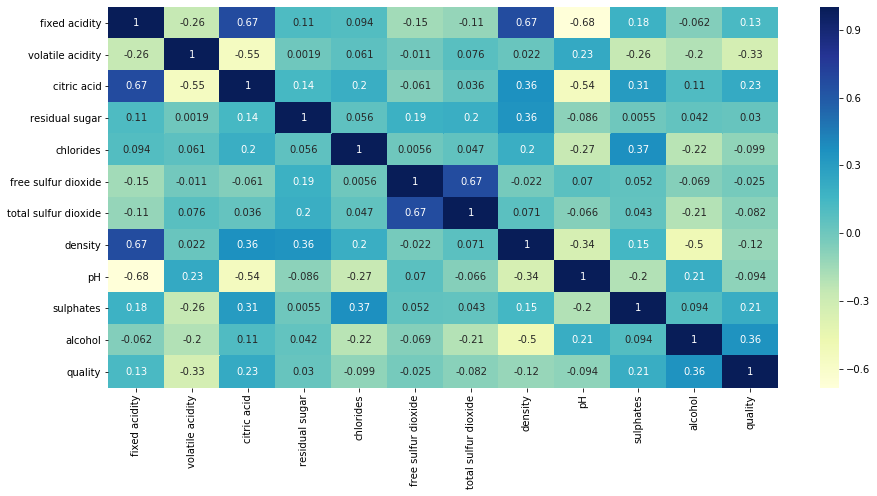

In [253]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [194]:
X=data.drop('quality',axis=1)
y=data['quality']

In [195]:
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64

In [247]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [248]:
model=SVC(kernel='rbf',C=10,gamma=4)
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=4, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [249]:
y_pred=model.predict(X_test)

In [250]:
accuracy_score(y_test,y_pred)

0.875

In [251]:
confusion_matrix(y_test,y_pred)

array([[  0,  16,   0],
       [  0, 339,   0],
       [  0,  34,  11]], dtype=int64)